# Control Methods
There are two different methods of controlling integrated in this packaging following the two differnt ways to do a time series simulation. The first one is the more intuitive one, but sometimes the second method might be usefull.

## First method: do_simstep()

In [14]:
CP_WATER = 4182 # J/(kg*K)
from ThermoBuilPy import *
cap1 = ThermalStorage.newStorage(cap=1000,temp=21,name='Capacity 1')
extStor1 = ExtStorage.newExtStorage(temp=70)
extStor2 = ExtStorage.newExtStorage()
extStor3 = ExtStorage.newExtStorage(temp=10)

cond = Conduction.newConduction(cap1,extStor3,10)
forcedConv = ForcedConvection.newForcedConvection([extStor1,cap1,extStor2],massFlow=5)

ts = ThermalSystem.newThermalSystem(storages=[cap1],extStorages=[extStor1,extStor2,extStor3],
                                    forcedConvection=[forcedConv],
                                    conductions=[cond])

In [15]:
temp_min=20
temp_max=22
massflow_on=5
ts.prepare_simulation(1)
for t in range(500):
    if cap1.get_temp()<temp_min:
        forcedConv.set_mFlow(massflow_on)
    elif cap1.get_temp()>temp_max:
        forcedConv.set_mFlow(0)
    ts.do_simstep()

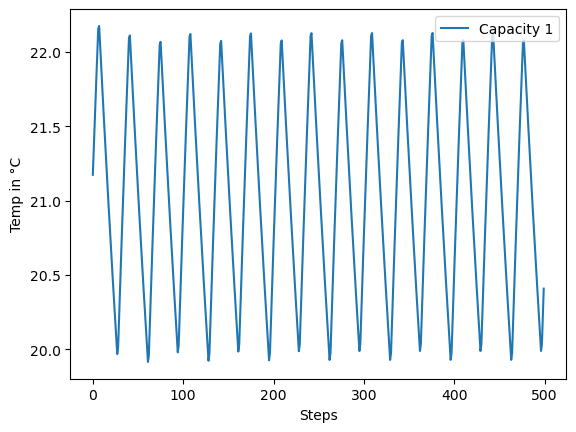

In [16]:
ts.plot_temps([cap1])

## Second method:

In [ ]:
#TODO